<a href="https://colab.research.google.com/github/ansiyo/Machine-Learning-Rep/blob/main/ProjectIII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report, accuracy_score

ModuleNotFoundError: No module named 'keras.utils.np_utils'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# The to_categorical function has been moved to tensorflow.keras.utils
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
# import the heart disease dataset
dataset = "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

column_names =  ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','class']

# read the csv
dataset = pd.read_csv(dataset, names=column_names)

In [ ]:
# remove missing data with "?"
df = dataset[~dataset.isin(['?'])]

#drop rows with NaN values from DataFrame
df = df.dropna(axis=0)

# checking data type of the dataframe
print (df.dtypes)

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
class         int64
dtype: object


age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
class         int64
dtype: object


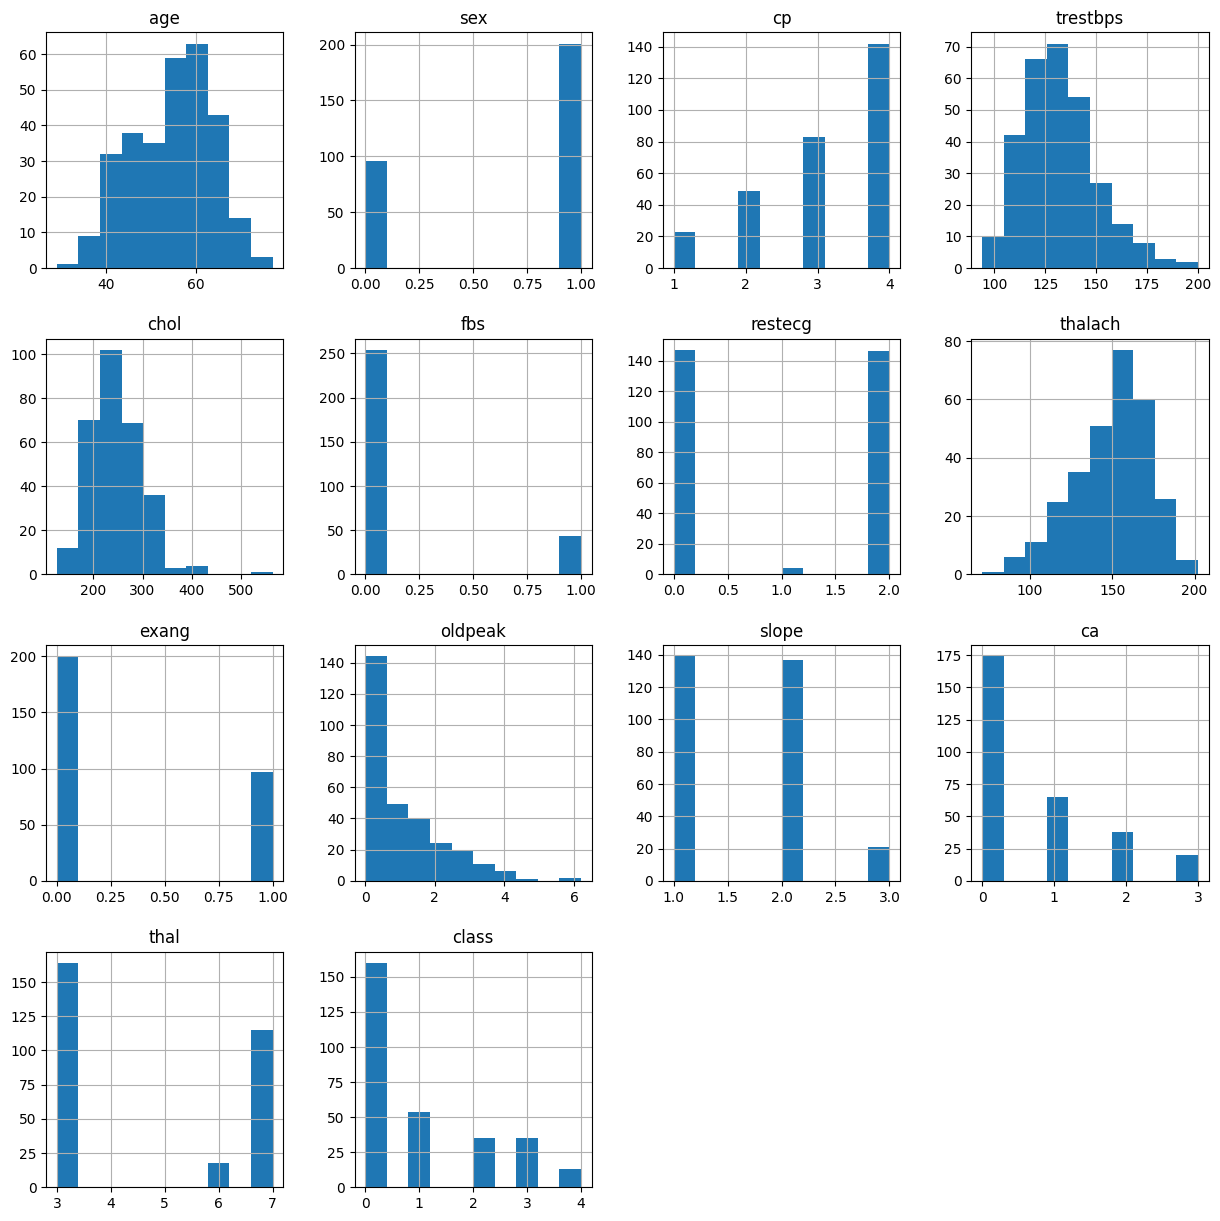

In [ ]:
# transform data to numeric because ca and thal are object datatypes
data = df.apply(pd.to_numeric)
print(data.dtypes)
# plot histograms for each variable
data.hist(figsize = (15, 15))
plt.show()


In [ ]:
# create X and Y datasets for training
X = data.iloc[:,0:13]
y = data.iloc[:,-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,shuffle = True)

# There are 4 classes so we need to one-hot encode them
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# create model
model = Sequential()
model.add(Dense(10, input_dim=13, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, kernel_initializer='normal', activation='relu'))
model.add(Dense(4, kernel_initializer='normal', activation='relu'))
model.add(Dense(5, activation='softmax'))

# Change the filepath to end with '.keras'
filepath="CNN_Model-{epoch:02d}-{val_accuracy:.2f}.keras"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# compile model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
train_model = model.fit(X_train, y_train, epochs=60, batch_size=8, verbose = 1, validation_data=(X_test,y_test),callbacks=[callbacks_list])

# Plotting the model
plt.plot(train_model.history['accuracy'], marker='.')
plt.plot(train_model.history['val_accuracy'], marker='.')
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.grid()
plt.legend(['accuracy', 'val_accuracy'], loc='lower right')
plt.savefig('model_accuracy.png')
plt.close()

Epoch 1/60
19/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1352 - loss: 1.6793
Epoch 1: val_accuracy improved from -inf to 0.61667, saving model to CNN_Model-01-0.62.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.1851 - loss: 1.6607 - val_accuracy: 0.6167 - val_loss: 1.5712
Epoch 2/60
21/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5388 - loss: 1.5598 
Epoch 2: val_accuracy did not improve from 0.61667
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5301 - loss: 1.5489 - val_accuracy: 0.5000 - val_loss: 1.4581
Epoch 3/60
22/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4398 - loss: 1.4400  
Epoch 3: val_accuracy did not improve from 0.61667
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4513 - loss: 1.4349 - val_accuracy: 0.6167 - val_loss: 1.3758
Epoch 4/60
21/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5053 - loss: 1.3695  
Epoch 4: val_accuracy did not improve from 0.61667
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5094 - loss: 1

In [ ]:
# Plotting the model
plt.plot(train_model.history['accuracy'], marker='.')
plt.plot(train_model.history['val_accuracy'], marker='.')
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.grid()
plt.legend(['accuracy', 'val_accuracy'], loc='lower right')
plt.savefig('model_accuracy.png')
plt.close()

In [ ]:
plt.plot(train_model.history['loss'], marker='.')
plt.plot(train_model.history['val_loss'], marker='.')
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.savefig('model_loss.png')
plt.close()


pred = model.predict(X_test)

print('Maximum Probabilities of Test Dataset: ',np.max(pred, axis=-1))

for i in pred:
    if(np.max(i) > 0.8):
        print("Critical")
    elif(np.max(i) > 0.5):
        print("moderate or severe")
    elif(np.max(i) > 0.3):
        print("mild or moderate")
    else:
        print("None")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Maximum Probabilities of Test Dataset:  [0.25007412 0.44017342 0.8170576  0.90633523 0.94202936 0.36158356
 0.45117608 0.80880046 0.40814343 0.78516203 0.5531393  0.34119564
 0.90910125 0.8438239  0.44121885 0.30990076 0.31363362 0.6672904
 0.34929642 0.34376845 0.272832   0.39105472 0.7795012  0.33579895
 0.89330417 0.4111442  0.35335812 0.5464209  0.23750404 0.52946085
 0.76579744 0.31642526 0.6972689  0.85420525 0.57096636 0.90486866
 0.5100693  0.34621677 0.8354552  0.9308398  0.8114432  0.2529462
 0.5937745  0.6585003  0.6098674  0.8059575  0.25723714 0.24138485
 0.39727783 0.88487864 0.32908937 0.4129345  0.7556579  0.82614166
 0.8625546  0.6993095  0.75166184 0.5394404  0.76082426 0.29135475]
None
mild or moderate
Critical
Critical
Critical
mild or moderate
mild or moderate
Critical
mild or moderate
moderate or severe
moderate or severe
mild or moderate
Critical
Critical
mild or moderate
mild or moderate
mild or moderate
moderate or severe
m

In [ ]:
# need to take argmax if it is a multiclass problem
y_pred = np.argmax(pred, axis=1)
y_test = np.argmax(y_test, axis=1)


print('Classification Accuracy: '+str(accuracy_score(y_test, y_pred) * 100)+' %')

Classification Accuracy: 61.66666666666667 %


1 input layer with 10 neurons, 2 hidden layers with 8 and 4 neurons respectively, and 1 fully connected activation output layer. For multi-class classification, we always make use of the softmax activation function. The softmax activation function always adds up the probability to 1 for each prediction. It varies from 1 to 10.

BINARY CLASSIFICATION

I will convert my program to binary classification such that the class column with a label greater than 0 will have heart disease.

1 — Will have heart disease.

0 — Does not have heart disease.

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
class         int64
dtype: object
age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
class         int64
dtype: object


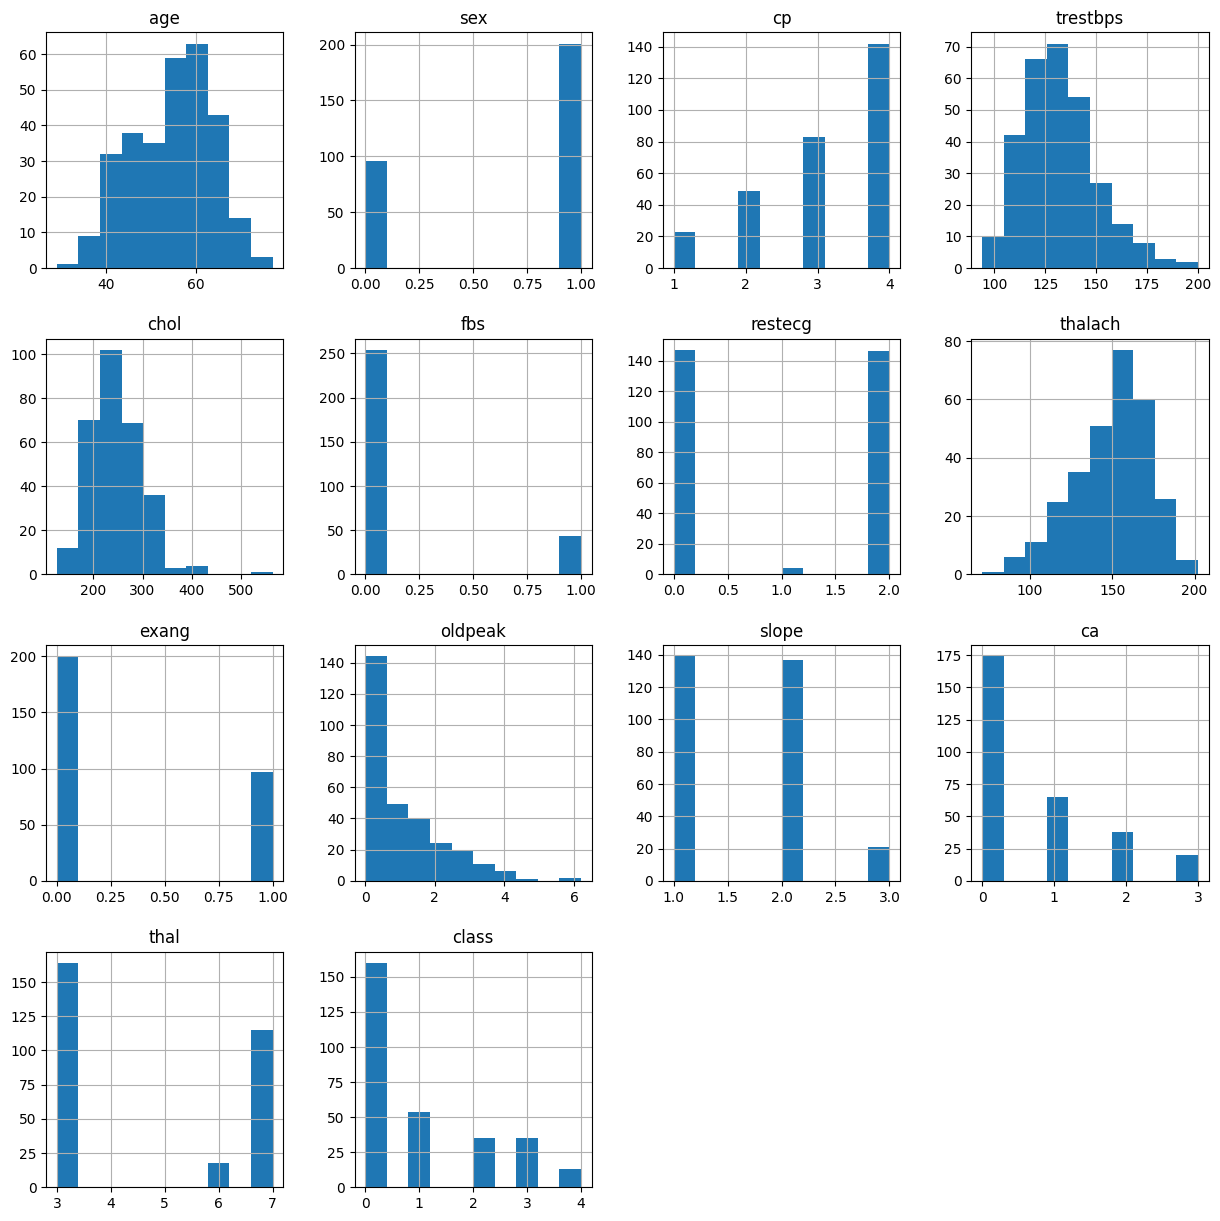

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: The filepath provided must end in `.keras` (Keras model format). Received: filepath=CNN_Model-{epoch:02d}-{val_accuracy:.2f}.h5

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report, accuracy_score

# import the heart disease dataset
dataset = "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

column_names =  ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','class']

# read the csv
dataset = pd.read_csv(dataset, names=column_names)

# remove missing data with "?"
df = dataset[~dataset.isin(['?'])]

#drop rows with NaN values from DataFrame
df = df.dropna(axis=0)

# checking data type of the dataframe
print (df.dtypes)

# transform data to numeric because ca and thal are object datatypes
data = df.apply(pd.to_numeric)
print(data.dtypes)
# plot histograms for each variable
data.hist(figsize = (15, 15))
plt.show()



# create X and Y datasets for training
X = data.iloc[:,0:13]
y = data.iloc[:,-1]

# changing class column to binary.
# 0 = no heart disease
# 1 = heart disease
data["class"] = np.where(data["class"] > 0, 1, data["class"])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,shuffle = True)

# create model
model = Sequential()
model.add(Dense(10, input_dim=13, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, kernel_initializer='normal', activation='relu'))
model.add(Dense(4, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, activation='sigmoid'))

filepath="CNN_Model-{epoch:02d}-{val_accuracy:.2f}.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# compile model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

train_model = model.fit(X_train, y_train, epochs=60, batch_size=8, verbose = 1, validation_data=(X_test,y_test),callbacks=[callbacks_list])

plt.plot(train_model.history['accuracy'], marker='.')
plt.plot(train_model.history['val_accuracy'], marker='.')
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.grid()
plt.legend(['accuracy', 'val_accuracy'], loc='lower right')
plt.savefig('model_accuracy_binary.png')
plt.close()

plt.plot(train_model.history['loss'], marker='.')
plt.plot(train_model.history['val_loss'], marker='.')
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.savefig('model_loss_binary.png')
plt.close()

# Rounding the prediction if it is a binary problem
pred = np.round(model.predict(X_test))
print(pred)

for i in pred:
    if(np.max(i) > 0.5):
        print("Have Heart Disease")
    else:
        print("Does not have heart disease")


print('Classification Accuracy: '+str(accuracy_score(y_test, pred) * 100)+' %')

In [ ]:
filepath="CNN_Model-{epoch:02d}-{val_accuracy:.2f}.keras"  # Change the filepath to end with '.keras'
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

RESULTS
We can clearly see that Binary classification outperformed multi-class classification reason being that the neural network will have difficulties recognizing the classes if there are more than 2 classes. This is not the case for each and every problem. Again, it depends on a lot of factors such as different datasets, its pre-processing part, and its features.

Testing Classification Accuracy of Multi-Class Classification is: 63 %
Testing Classification Accuracy of Binary Classification is: 78 %